In [4]:
import sys
import pyopencl as cl
import torch
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sys.path.append('/home/slaskina/SAXS-simulations')

from SAXSsimulations import  Sphere, Cylinder, DensityData
from SAXSsimulations.plotting import *


In [5]:
one_run_per_shape = pd.DataFrame()

In [6]:
size = 625
simulation = Sphere(size = 250, nPoints = size, volFrac = 0.01)
simulation.place_shape(rMean = 5, rWidth = 0.1, nonoverlapping=False)
simulation.pin_memory()
simulation.calculate_custom_FTI( three_d = True, device = 'cuda', less_memory_use=True)

simulation.reBin(size if size < 150 else 150, for_sas = True)

simulation.drop_first_bin()
simulation.init_sas_model()
simulation.optimize_scaling()

one_run  = pd.DataFrame({
    'shape': 'sphere',
    'size': size, 
    'chi2_Istd': simulation.Chi_squared_norm('IStd'),
    'chi2_ISEM': simulation.Chi_squared_norm('ISEM'),
    'chi2_ISigma': simulation.Chi_squared_norm('ISigma'),
    'chi2_IError': simulation.Chi_squared_norm('IError'),
}, index = [0])
one_run['shape'] = 'sphere'
one_run_per_shape = pd.concat([one_run_per_shape,one_run])

spheres accepted:290 and declined: 0


/home/slaskina/SAXS-simulations/SAXSsimulations/create_form.py:112: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at /opt/conda/conda-bld/pytorch_1666642975993/work/aten/src/ATen/native/Copy.cpp:250.)
  if FT[k,:,:].any():


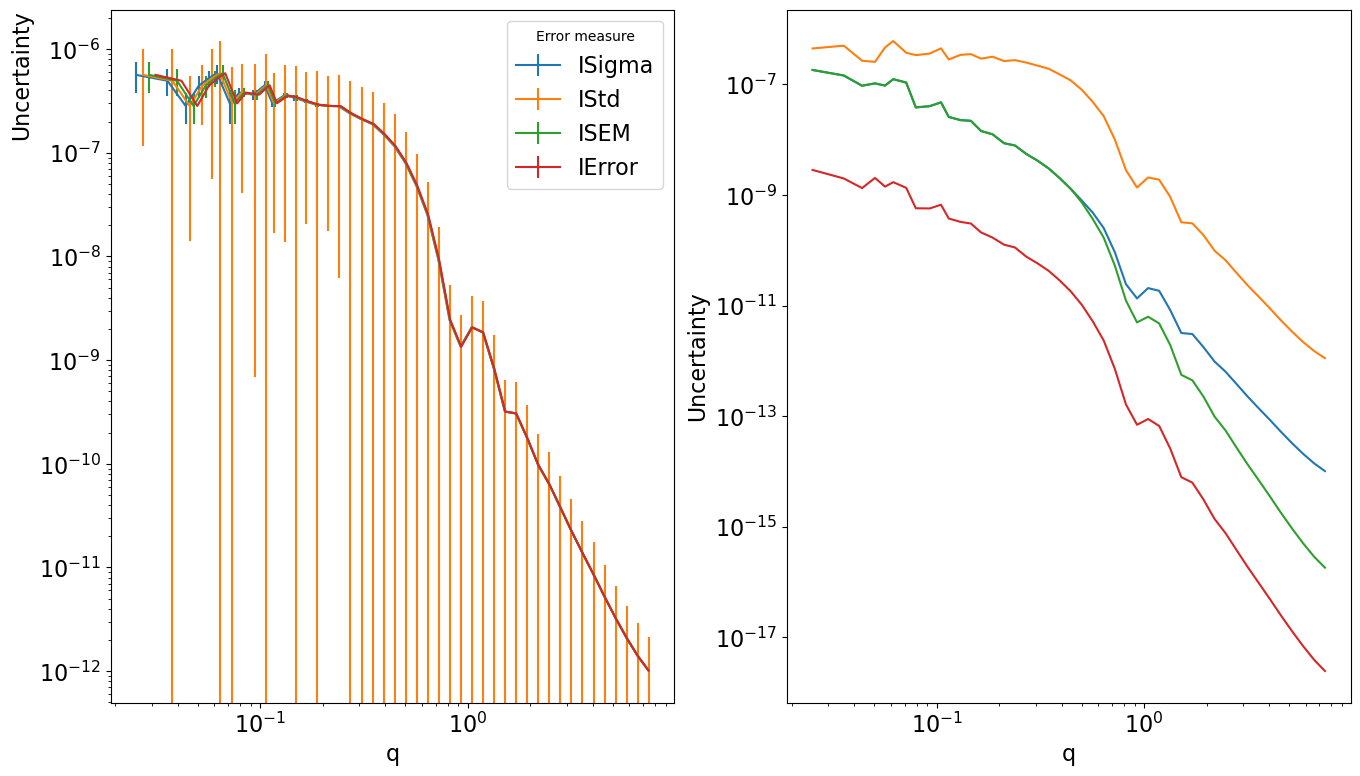

In [17]:
fig, axes = plt.subplots(1,2, figsize=(16,9))
#Isigma
simulation.binned_slice.plot('Q', 'I', yerr = 'ISigma', label ='ISigma', ax = axes[0])
temp = simulation.binned_slice.copy()
temp['Q'] = temp.Q +0.002
#Istd
temp.plot('Q', 'I', yerr = 'IStd', label ='IStd', ax = axes[0])
#Isem
temp['Q'] = temp.Q +0.002
temp.plot('Q', 'I', yerr = 'ISEM', label ='ISEM', ax = axes[0])
#Ierror
temp['Q'] = temp.Q +0.002
temp.plot('Q', 'I', yerr = 'IError', label ='IError', ax = axes[0])

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel ('q', fontsize =16)
axes[0].set_ylabel( ylabel = 'Uncertainty', fontsize =16, loc = "top")
axes[0].tick_params(labelsize = 16)
axes[0].tick_params(labelsize = 16)
axes[0].legend(fontsize = 16, title = 'Error measure', )
# title = 'rebinned Q vs I')

ax = axes[1]
ax.plot(simulation.binned_slice.Q, simulation.binned_slice.ISigma, label = 'ISigma')
ax.plot(simulation.binned_slice.Q, simulation.binned_slice.IStd, label = 'IStd')
ax.plot(simulation.binned_slice.Q, simulation.binned_slice.ISEM, label = 'ISEM')
ax.plot(simulation.binned_slice.Q, simulation.binned_slice.IError, label = 'IError')
#ax.legend()

axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel ('q', fontsize =16)
axes[1].set_ylabel( ylabel = 'Uncertainty', fontsize =16)
axes[1].tick_params(labelsize = 16)
axes[1].tick_params(labelsize = 16)


In [9]:
size=625
simulation_c = Cylinder(size = 250, nPoints = size, volFrac = 0.01)
simulation_c.place_shape(rMean = 5, hMean = 25,  rWidth = 0.1)
simulation_c.pin_memory()
simulation_c.calculate_custom_FTI( three_d = True, device = 'cuda', less_memory_use=True)

simulation_c.reBin(size if size < 150 else 150, for_sas = True)
simulation_c.init_sas_model()
simulation_c.optimize_scaling()

one_run  = pd.DataFrame({
    'shape': 'cylinder',
    'size': size, 
    'chi2_Istd': simulation_c.Chi_squared_norm('IStd'),
    'chi2_ISEM': simulation_c.Chi_squared_norm('ISEM'),
    'chi2_ISigma': simulation_c.Chi_squared_norm('ISigma'),
    'chi2_IError': simulation_c.Chi_squared_norm('IError'),
}, index = [0])
one_run['shape'] = 'cylinder'
one_run_per_shape = pd.concat([one_run_per_shape,one_run])

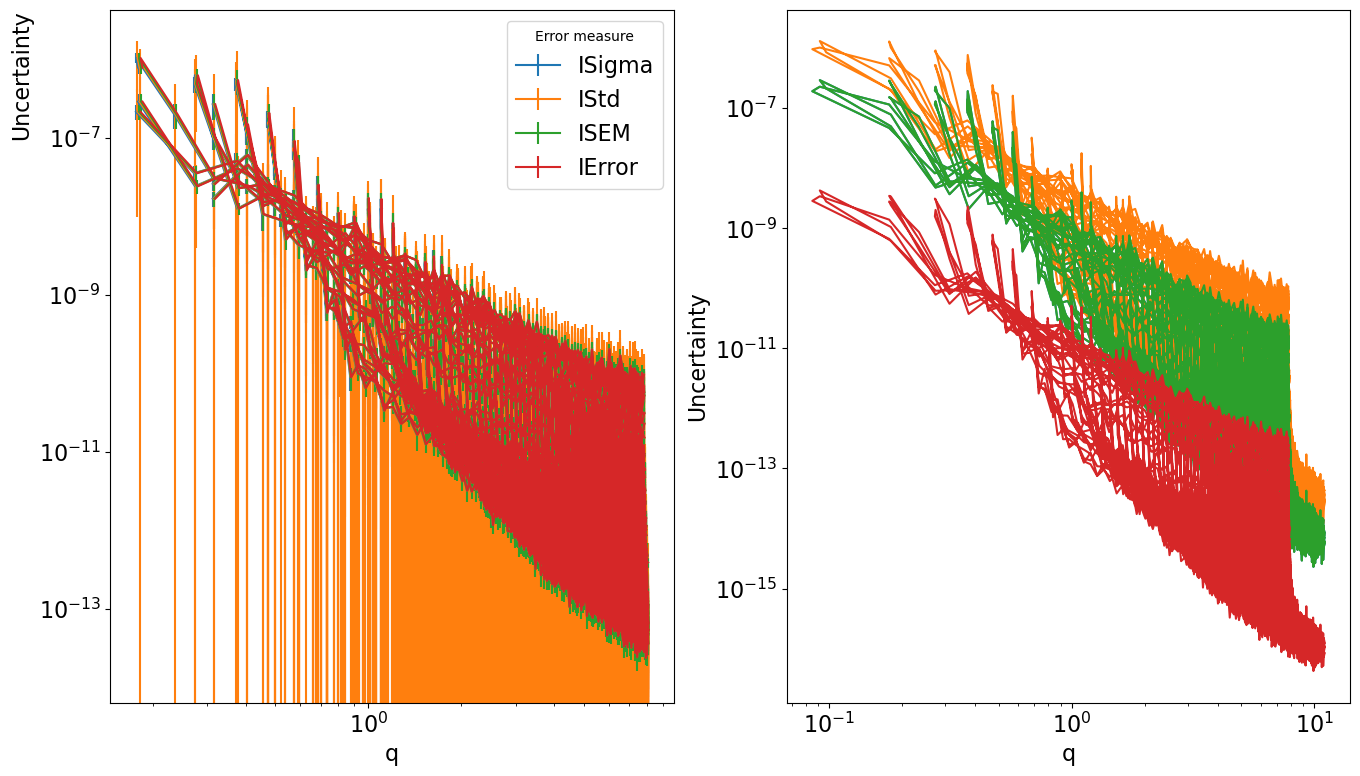

In [18]:
fig, axes = plt.subplots(1,2, figsize=(16,9))
#Isigma
simulation_c.binned_slice.plot('Q', 'I', yerr = 'ISigma', label ='ISigma', ax = axes[0])
temp = simulation_c.binned_slice.copy()
temp['Q'] = temp.Q +0.002
#Istd
temp.plot('Q', 'I', yerr = 'IStd', label ='IStd', ax = axes[0])
#Isem
temp['Q'] = temp.Q +0.002
temp.plot('Q', 'I', yerr = 'ISEM', label ='ISEM', ax = axes[0])
#Ierror
temp['Q'] = temp.Q +0.002
temp.plot('Q', 'I', yerr = 'IError', label ='IError', ax = axes[0])

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel ('q', fontsize =16)
axes[0].set_ylabel( ylabel = 'Uncertainty', fontsize =16, loc = "top")
axes[0].tick_params(labelsize = 16)
axes[0].tick_params(labelsize = 16)
axes[0].legend(fontsize = 16, title = 'Error measure', )
# title = 'rebinned Q vs I')

ax = axes[1]
ax.plot(simulation_c.binned_slice.Q, simulation_c.binned_slice.ISigma, label = 'ISigma')
ax.plot(simulation_c.binned_slice.Q, simulation_c.binned_slice.IStd, label = 'IStd')
ax.plot(simulation_c.binned_slice.Q, simulation_c.binned_slice.ISEM, label = 'ISEM')
ax.plot(simulation_c.binned_slice.Q, simulation_c.binned_slice.IError, label = 'IError')
#ax.legend()

axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel ('q', fontsize =16)
axes[1].set_ylabel( ylabel = 'Uncertainty', fontsize =16)
axes[1].tick_params(labelsize = 16)
axes[1].tick_params(labelsize = 16)


In [10]:
size = 625
simulation_h = Sphere(size = 250, nPoints = size, volFrac = 0.15)
simulation_h.place_shape(rMean = 5, rWidth = 0.1, nonoverlapping=True)
simulation_h.pin_memory()
simulation_h.calculate_custom_FTI( three_d = True, device = 'cuda', less_memory_use=True)

simulation_h.reBin(size if size < 150 else 150, for_sas = True)

simulation_h.drop_first_bin()
simulation_h.init_sas_model()
simulation_h.optimize_scaling()

one_run  = pd.DataFrame({
    'shape': 'sphere',
    'size': size, 
    'chi2_Istd': simulation_h.Chi_squared_norm('IStd'),
    'chi2_ISEM': simulation_h.Chi_squared_norm('ISEM'),
    'chi2_ISigma': simulation_h.Chi_squared_norm('ISigma'),
    'chi2_IError': simulation_h.Chi_squared_norm('IError'),
}, index = [0])
one_run['shape'] = 'sphere'
one_run_per_shape = pd.concat([one_run_per_shape,one_run])

spheres accepted:4588 and declined: 7146
simulating hardsphere


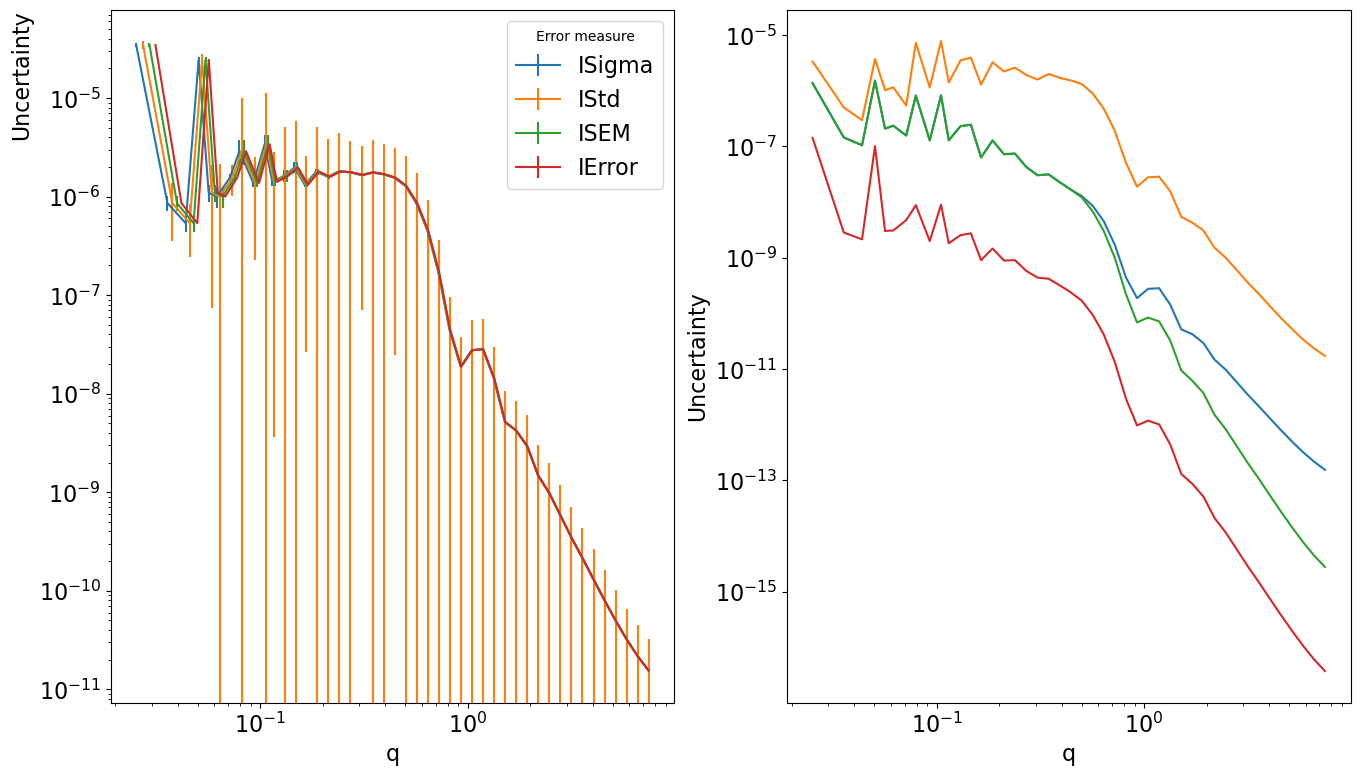

In [19]:
fig, axes = plt.subplots(1,2, figsize=(16,9))
#Isigma
simulation_h.binned_slice.plot('Q', 'I', yerr = 'ISigma', label ='ISigma', ax = axes[0])
temp = simulation_h.binned_slice.copy()
temp['Q'] = temp.Q +0.002
#Istd
temp.plot('Q', 'I', yerr = 'IStd', label ='IStd', ax = axes[0])
#Isem
temp['Q'] = temp.Q +0.002
temp.plot('Q', 'I', yerr = 'ISEM', label ='ISEM', ax = axes[0])
#Ierror
temp['Q'] = temp.Q +0.002
temp.plot('Q', 'I', yerr = 'IError', label ='IError', ax = axes[0])

axes[0].set_xscale('log')
axes[0].set_yscale('log')
axes[0].set_xlabel ('q', fontsize =16)
axes[0].set_ylabel( ylabel = 'Uncertainty', fontsize =16, loc = "top")
axes[0].tick_params(labelsize = 16)
axes[0].tick_params(labelsize = 16)
axes[0].legend(fontsize = 16, title = 'Error measure', )
# title = 'rebinned Q vs I')

ax = axes[1]
ax.plot(simulation_h.binned_slice.Q, simulation_h.binned_slice.ISigma, label = 'ISigma')
ax.plot(simulation_h.binned_slice.Q, simulation_h.binned_slice.IStd, label = 'IStd')
ax.plot(simulation_h.binned_slice.Q, simulation_h.binned_slice.ISEM, label = 'ISEM')
ax.plot(simulation_h.binned_slice.Q, simulation_h.binned_slice.IError, label = 'IError')
#ax.legend()

axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel ('q', fontsize =16)
axes[1].set_ylabel( ylabel = 'Uncertainty', fontsize =16)
axes[1].tick_params(labelsize = 16)
axes[1].tick_params(labelsize = 16)


In [13]:
simulation_h.binned_slice.mean()

Q         1.428424e+00
I         2.102640e-06
IStd      1.260592e-06
ISEM      1.468512e-07
IError    6.482399e-09
ISigma    1.469778e-07
QStd      4.977902e-02
QSEM      1.261439e-04
QSigma    1.428424e-02
dtype: float64